In [2]:
from lstm import LSTMModel
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import torch
import os
from compute_results import plot_roc_curve, get_overall_metrics

In [3]:
RANDOM_SEED = 33
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Importing preprocessed data

In [4]:
PATH_PROJECT_ROOT = '../..'
PATH_TRAIN_MAJBA_CSV = f'{PATH_PROJECT_ROOT}/data/train_MajBa_preprocessed.csv'
PATH_VAL_MAJBA_CSV = f'{PATH_PROJECT_ROOT}/data/val_MajBa_preprocessed.csv'
PATH_TEST_MAJBA_CSV = f'{PATH_PROJECT_ROOT}/data/test_MajBa_preprocessed.csv'

y_train = pd.read_csv(PATH_TRAIN_MAJBA_CSV, usecols=['label'])
y_val = pd.read_csv(PATH_VAL_MAJBA_CSV, usecols=['label'])
y_test = pd.read_csv(PATH_TEST_MAJBA_CSV, usecols=['label'])

In [5]:
PATH_TRAIN_NPY = f'{PATH_PROJECT_ROOT}/data/train_MajBa_charlevel_features.npy'
PATH_VAL_NPY = f'{PATH_PROJECT_ROOT}/data/val_MajBa_charlevel_features.npy'
PATH_TEST_NPY = f'{PATH_PROJECT_ROOT}/data/test_MajBa_charlevel_features.npy'

cl_features_train = np.load(PATH_TRAIN_NPY)
cl_features_val = np.load(PATH_VAL_NPY)
cl_features_test = np.load(PATH_TEST_NPY)

In [6]:
cl_features_train = torch.tensor(cl_features_train, dtype=torch.int32)
cl_features_val = torch.tensor(cl_features_val, dtype=torch.int32)
cl_features_test = torch.tensor(cl_features_test, dtype=torch.int32)

In [7]:
y_train = torch.FloatTensor(y_train.to_numpy().squeeze())
y_val = torch.FloatTensor(y_val.to_numpy().squeeze())

# LSTM Baseline

In [8]:
MAX_FEATURES = cl_features_test.shape[1]
EMBEDDING_DIM = 128
HIDDEN_DIM = 64
DROPOUT_RATE = 0.3

LEARNING_RATE = 4e-4
WEIGHT_DECAY = 3e-5
NUM_EPOCHS = 25
BATCH_SIZE = 256
PATIENCE = 5
DELTA = 0.001

In [10]:
# model_lstm_MajBa = LSTMModel(max_features=MAX_FEATURES,
#                             embedding_dim=EMBEDDING_DIM,
#                             hidden_dim=HIDDEN_DIM,
#                             dropout_rate=DROPOUT_RATE)
# model_lstm_MajBa.compile(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
# model_lstm_MajBa, train_avg_losses_MajBa, val_avg_losses_MajBa = model_lstm_MajBa.fit(
#                                                 X_train=cl_features_train,
#                                                 y_train=y_train,
#                                                 num_epochs= NUM_EPOCHS,
#                                                 batch_size=BATCH_SIZE,
#                                                 X_val=cl_features_val,
#                                                 y_val=y_val,
#                                                 patience=PATIENCE,
#                                                 delta=DELTA,
#                                             )

Using early stopping with patience=5, delta=0.001


100%|██████████| 2062/2062 [12:58<00:00,  2.65it/s]


Epoch#1: Train Average Loss = 0.12690


100%|██████████| 688/688 [01:19<00:00,  8.69it/s]


Validation score improved (inf --> 0.06511).  Saving model ...


100%|██████████| 2062/2062 [12:56<00:00,  2.66it/s]


Epoch#2: Train Average Loss = 0.06130


100%|██████████| 688/688 [01:21<00:00,  8.49it/s]


Validation score improved (0.06511 --> 0.05361).  Saving model ...


100%|██████████| 2062/2062 [13:06<00:00,  2.62it/s]


Epoch#3: Train Average Loss = 0.05255


100%|██████████| 688/688 [01:19<00:00,  8.60it/s]


Validation score improved (0.05361 --> 0.05165).  Saving model ...


100%|██████████| 2062/2062 [12:50<00:00,  2.68it/s]


Epoch#4: Train Average Loss = 0.04782


100%|██████████| 688/688 [01:19<00:00,  8.64it/s]


Validation score improved (0.05165 --> 0.04734).  Saving model ...


100%|██████████| 2062/2062 [12:56<00:00,  2.66it/s]


Epoch#5: Train Average Loss = 0.04468


100%|██████████| 688/688 [01:20<00:00,  8.60it/s]


Validation score improved (0.04734 --> 0.04493).  Saving model ...


100%|██████████| 2062/2062 [13:20<00:00,  2.58it/s]


Epoch#6: Train Average Loss = 0.04267


100%|██████████| 688/688 [01:21<00:00,  8.39it/s]


Validation score improved (0.04493 --> 0.04337).  Saving model ...


100%|██████████| 2062/2062 [13:42<00:00,  2.51it/s]


Epoch#7: Train Average Loss = 0.04071


100%|██████████| 688/688 [01:21<00:00,  8.43it/s]


EarlyStopping counter: 1 out of 5. Current validation score: 0.04301


100%|██████████| 2062/2062 [12:01<00:00,  2.86it/s]


Epoch#8: Train Average Loss = 0.03940


100%|██████████| 688/688 [00:59<00:00, 11.64it/s]


Validation score improved (0.04337 --> 0.04198).  Saving model ...


100%|██████████| 2062/2062 [08:03<00:00,  4.26it/s]


Epoch#9: Train Average Loss = 0.03846


100%|██████████| 688/688 [00:59<00:00, 11.61it/s]


EarlyStopping counter: 1 out of 5. Current validation score: 0.04209


100%|██████████| 2062/2062 [08:07<00:00,  4.23it/s]


Epoch#10: Train Average Loss = 0.03738


100%|██████████| 688/688 [00:59<00:00, 11.65it/s]


EarlyStopping counter: 2 out of 5. Current validation score: 0.04276


100%|██████████| 2062/2062 [08:00<00:00,  4.29it/s]


Epoch#11: Train Average Loss = 0.03647


100%|██████████| 688/688 [00:58<00:00, 11.73it/s]


EarlyStopping counter: 3 out of 5. Current validation score: 0.04243


100%|██████████| 2062/2062 [08:57<00:00,  3.83it/s]


Epoch#12: Train Average Loss = 0.03554


100%|██████████| 688/688 [01:06<00:00, 10.30it/s]


Validation score improved (0.04198 --> 0.04075).  Saving model ...


100%|██████████| 2062/2062 [14:08<00:00,  2.43it/s]


Epoch#13: Train Average Loss = 0.03516


100%|██████████| 688/688 [01:17<00:00,  8.82it/s]


EarlyStopping counter: 1 out of 5. Current validation score: 0.04242


100%|██████████| 2062/2062 [12:30<00:00,  2.75it/s]


Epoch#14: Train Average Loss = 0.03426


100%|██████████| 688/688 [01:21<00:00,  8.45it/s]


EarlyStopping counter: 2 out of 5. Current validation score: 0.04133


100%|██████████| 2062/2062 [12:43<00:00,  2.70it/s]


Epoch#15: Train Average Loss = 0.03383


100%|██████████| 688/688 [01:20<00:00,  8.58it/s]


EarlyStopping counter: 3 out of 5. Current validation score: 0.04120


100%|██████████| 2062/2062 [12:55<00:00,  2.66it/s]


Epoch#16: Train Average Loss = 0.03329


100%|██████████| 688/688 [01:21<00:00,  8.46it/s]


EarlyStopping counter: 4 out of 5. Current validation score: 0.04196


100%|██████████| 2062/2062 [12:15<00:00,  2.81it/s]


Epoch#17: Train Average Loss = 0.03287


100%|██████████| 688/688 [01:03<00:00, 10.82it/s]


EarlyStopping counter: 5 out of 5. Current validation score: 0.04090


100%|██████████| 2062/2062 [10:25<00:00,  3.30it/s]


Epoch#18: Train Average Loss = 0.03244


100%|██████████| 688/688 [01:24<00:00,  8.15it/s]

EarlyStopping counter: 6 out of 5. Current validation score: 0.04291
Stopped by early stopping at epoch 18


In [11]:
# model_lstm_MajBa = model_lstm_MajBa.eval()
# torch.save(model_lstm_MajBa.state_dict(), 'model_lstm_MajBa.pt')

In [11]:
model_lstm_MajBa = LSTMModel(max_features=MAX_FEATURES, embedding_dim=EMBEDDING_DIM, hidden_dim=HIDDEN_DIM, dropout_rate=DROPOUT_RATE)
model_lstm_MajBa.load_state_dict(torch.load('../../experiments/model_lstm_MajBa.pt'))
model_lstm_MajBa.eval()

LSTMModel(
  (embedding_layer): Embedding(256, 128)
  (lstm_layer): LSTM(128, 64, batch_first=True)
  (dropout_layer): Dropout(p=0.3, inplace=False)
  (linear_layer): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

##  Results

### Val

100%|██████████| 688/688 [01:29<00:00,  7.69it/s]


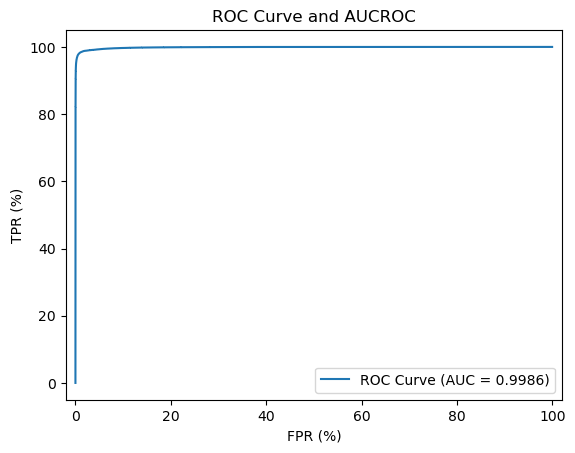

In [12]:
preds_val_MajBa = model_lstm_MajBa.batch_inference(cl_features_val, BATCH_SIZE)
plot_roc_curve(y_val, preds_val_MajBa)

In [13]:
fpr, tpr, thresholds = roc_curve(y_val, preds_val_MajBa)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
BEST_VALIDATION_THRESHOLD = df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('fpr').iloc[0]['thresholds']

In [14]:
get_overall_metrics(y_val, preds_val_MajBa > BEST_VALIDATION_THRESHOLD)

{'acc': 0.9870013981880392,
 'tpr': 0.9825897582519193,
 'fpr': 0.009130764061483323,
 'precision': 0.9895121174250778,
 'f1-score': 0.98603878860394}

### Test

100%|██████████| 917/917 [02:53<00:00,  5.28it/s]


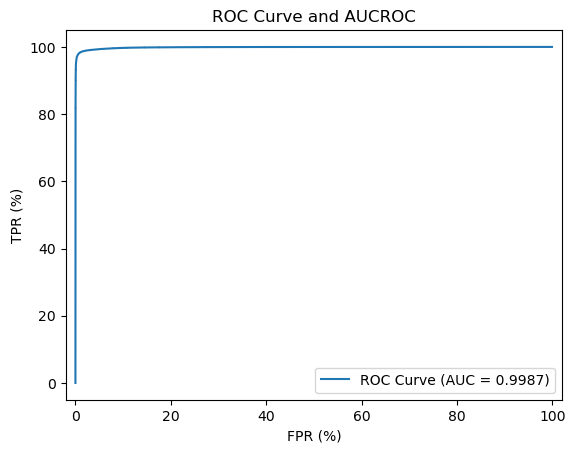

In [12]:
preds_test_MajBa = model_lstm_MajBa.batch_inference(cl_features_test, BATCH_SIZE)
plot_roc_curve(y_test, preds_test_MajBa)

In [16]:
get_overall_metrics(y_test, preds_test_MajBa > BEST_VALIDATION_THRESHOLD)

{'acc': 0.9871307387356665,
 'tpr': 0.9826170271010128,
 'fpr': 0.008912,
 'precision': 0.9897609353027141,
 'f1-score': 0.986176043665203}

In [13]:
# best_possible_test_threshold
fpr, tpr, thresholds = roc_curve(y_test, preds_test_MajBa)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
best_possible_test_threshold_AxAm = df_val_roc.sort_values('youden-index', ascending=False).query('fpr < 0.01').iloc[0]['thresholds']

In [18]:
get_overall_metrics(y_test, preds_test_MajBa > best_possible_test_threshold_AxAm)

{'acc': 0.9871818918112452,
 'tpr': 0.9832375216716853,
 'fpr': 0.00936,
 'precision': 0.9892584669904428,
 'f1-score': 0.9862388050138894}